In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning

In [2]:
sales = pd.read_csv('/Users/diegoalonso/Documents/Ironhack/Lessons/Week_2/Day_5/IronKaggle/sales.csv')
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [3]:
# Checking for data types to check if there is any categorical data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [4]:
# Any missing data to remove?

sales.isnull().any()
#No columns with missing data to remove

Unnamed: 0             False
store_ID               False
day_of_week            False
date                   False
nb_customers_on_day    False
open                   False
promotion              False
state_holiday          False
school_holiday         False
sales                  False
dtype: bool

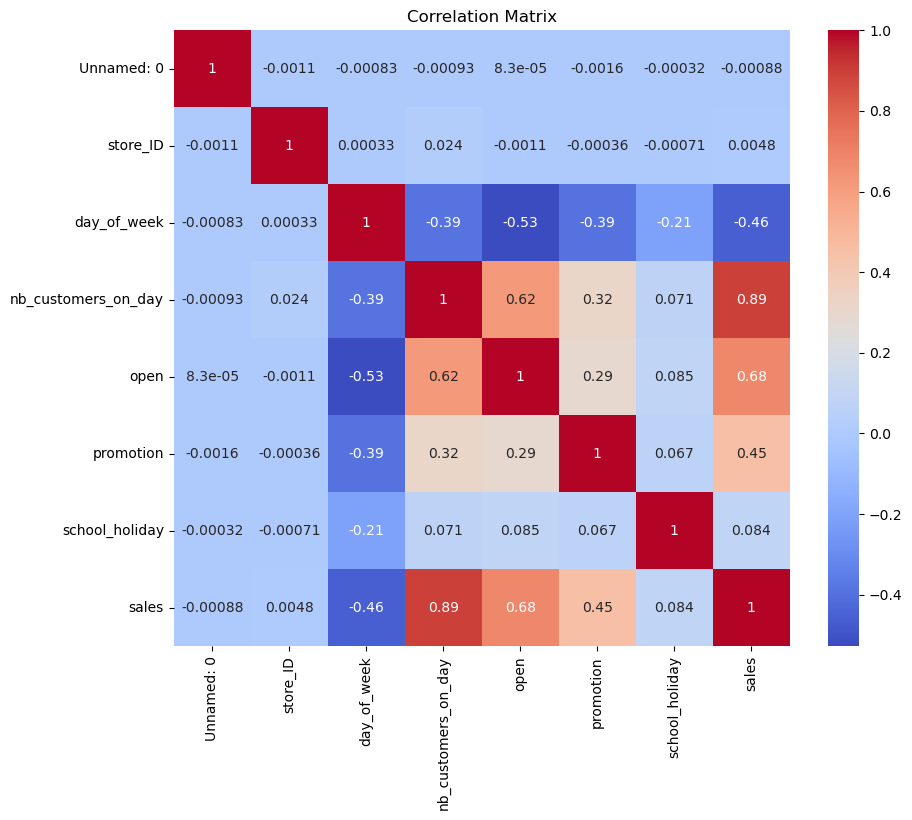

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = sales.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
corr_matrix = sales[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# What are the values in the state_holiday column? And their count?
sales.state_holiday.value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [7]:
# TRansform the values a, b, c to 1 to make the column categorical  

sales['state_holiday'] = np.where(sales['state_holiday'].isin(['a', 'b', 'c']), 1, 0)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sales['state_holiday'] = le.fit_transform(sales['state_holiday'])

In [8]:
# Check if it has converted correctly to categorical
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  int64 
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 48.9+ MB


In [9]:
import pandas as pd

# Convert 'date' from object to datetime
sales['date'] = pd.to_datetime(sales['date'])


# Extract day, month, and year from the 'date' column
sales['day'] = sales['date'].dt.day
sales['month'] = sales['date'].dt.month
sales['year'] = sales['date'].dt.year

# Drop the original 'date' column if not needed
sales = sales.drop(['date'], axis=1)

# Display the first few rows of the updated dataframe
print(sales.head())

# Drop unwanted columns Unnamed: 0 
# State_holiday & School_holiday drop after feature engineering
sales = sales.drop(['Unnamed: 0', 'state_holiday', 'school_holiday'], axis=1)

   Unnamed: 0  store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0      425390       366            4                  517     1          0   
1      291687       394            6                  694     1          0   
2      411278       807            4                  970     1          1   
3      664714       802            2                  473     1          1   
4      540835       726            4                 1068     1          1   

   state_holiday  school_holiday  sales  day  month  year  
0              0               0   4422   18      4  2013  
1              0               0   8297   11      4  2015  
2              0               0   9729   29      8  2013  
3              0               0   6513   28      5  2013  
4              0               0  10882   10     10  2013  


In [10]:
# Checking for data types again to check if there is any categorical data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             640840 non-null  int64
 1   day_of_week          640840 non-null  int64
 2   nb_customers_on_day  640840 non-null  int64
 3   open                 640840 non-null  int64
 4   promotion            640840 non-null  int64
 5   sales                640840 non-null  int64
 6   day                  640840 non-null  int32
 7   month                640840 non-null  int32
 8   year                 640840 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 36.7 MB


store_ID              -0.001089
day_of_week           -0.000169
nb_customers_on_day    1.588481
open                  -1.758789
promotion              0.486952
sales                  0.642366
day                    0.006122
month                  0.274716
year                   0.300122
dtype: float64


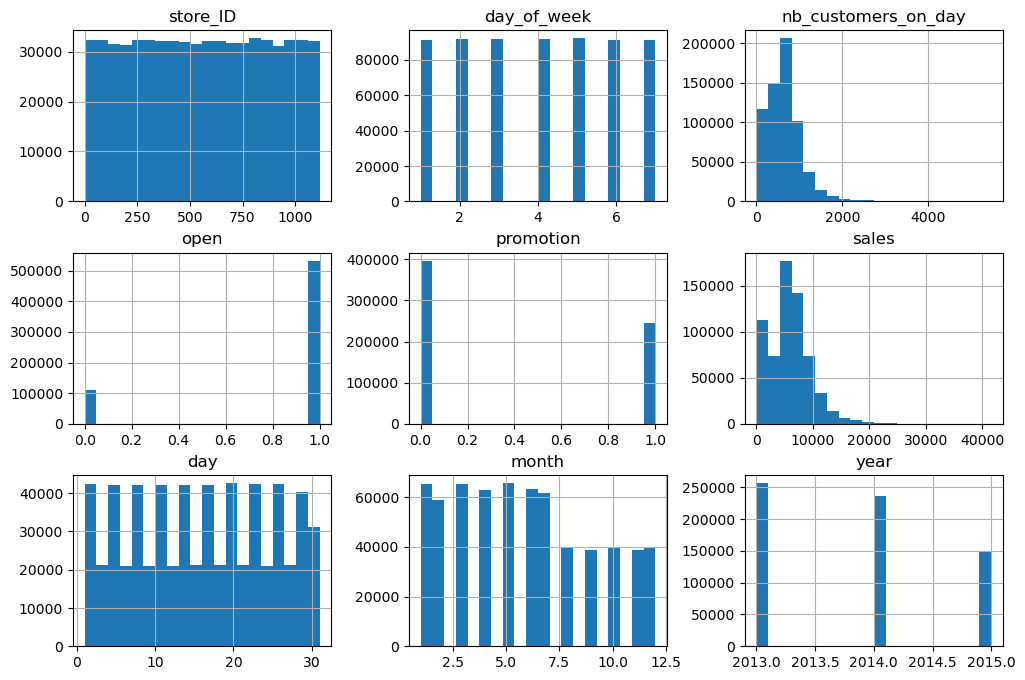

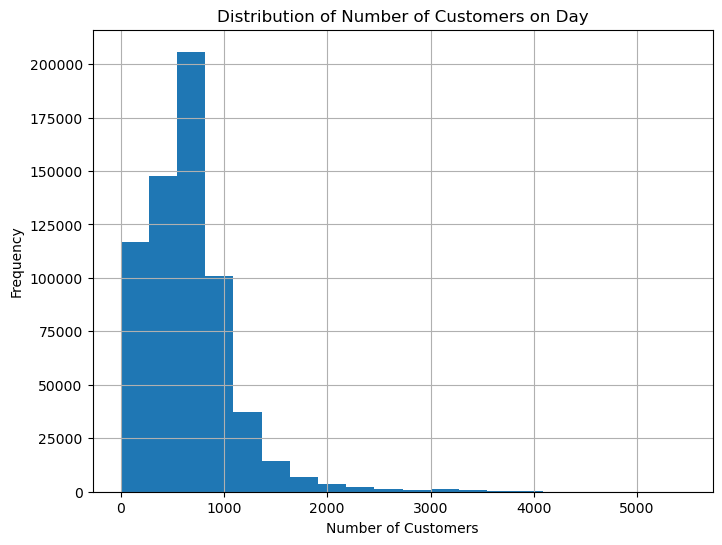

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate skewness and plot the distribution of each feature
skewness = sales.skew()
print(skewness)

# Data Distribution
sales.hist(bins=20, figsize=(12, 8))
plt.show()

# Data Distribution for nb_customers_on_day
sales['nb_customers_on_day'].hist(bins=20, figsize=(8, 6))
plt.title('Distribution of Number of Customers on Day')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()

# Data Distribution for nb_customers_on_day seems to be skewed

'Descriptive statistics:'

,count,mean,std,min,25%,50%,75%,max
store_ID,640840.0,558.211348,321.878521,1.0,280.0,558.0,837.0,1115.0
day_of_week,640840.0,4.000189,1.996478,1.0,2.0,4.0,6.0,7.0
nb_customers_on_day,640840.0,633.398577,464.094416,0.0,405.0,609.0,838.0,5458.0
open,640840.0,0.830185,0.375470,0.0,1.0,1.0,1.0,1.0
promotion,640840.0,0.381718,0.485808,0.0,0.0,0.0,1.0,1.0
sales,640840.0,5777.469011,3851.338083,0.0,3731.0,5746.0,7860.0,41551.0
day,640840.0,15.711689,8.791182,1.0,8.0,16.0,23.0,31.0
month,640840.0,5.846555,3.326202,1.0,3.0,6.0,8.0,12.0
year,640840.0,2013.832351,0.777335,2013.0,2013.0,2014.0,2014.0,2015.0


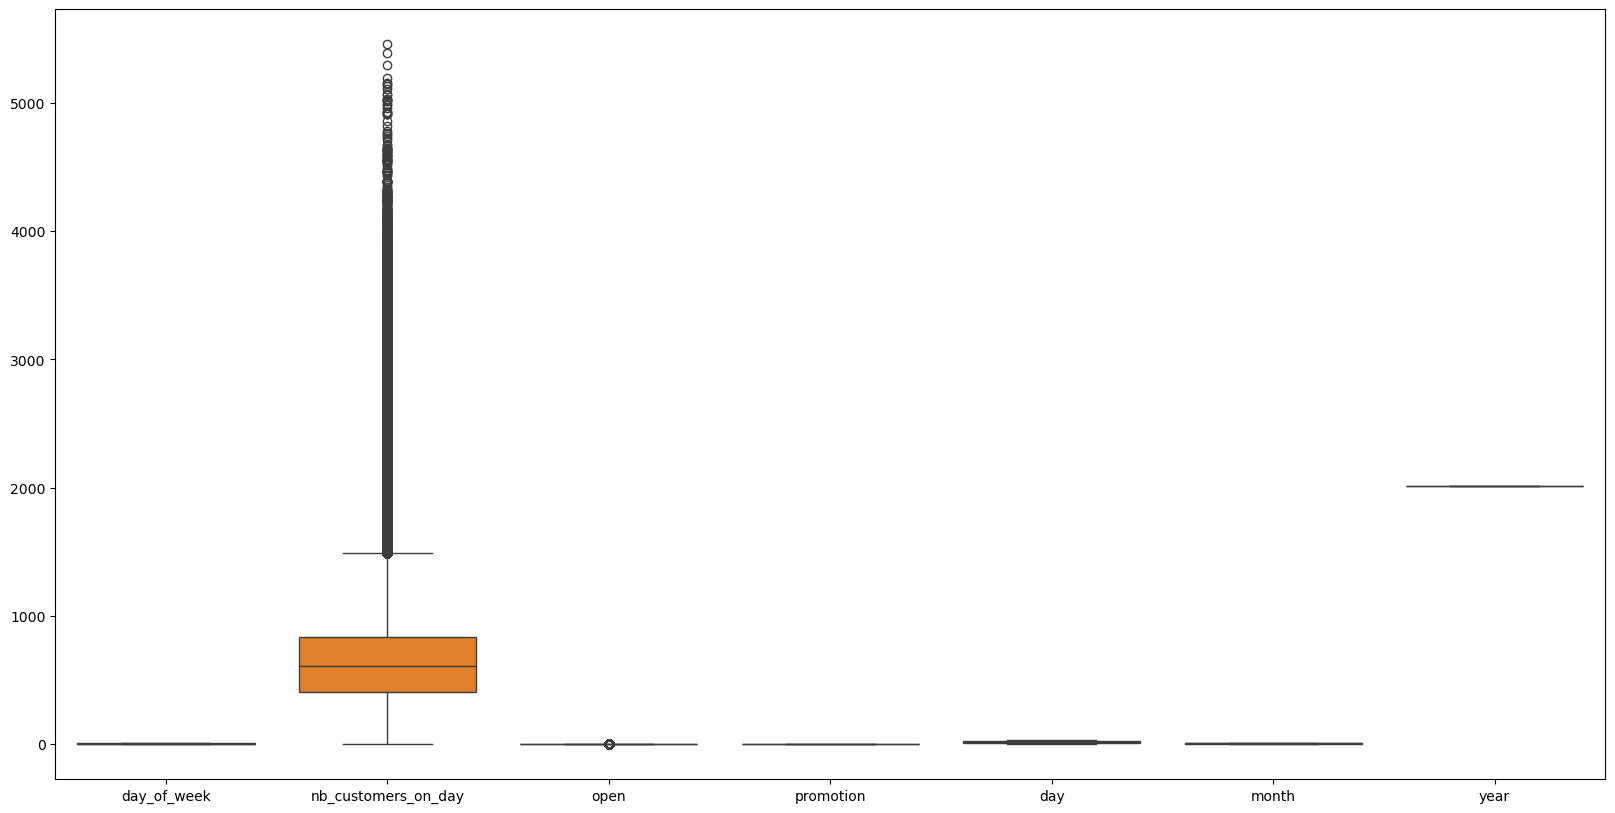

In [12]:

# Descriptive statistics - any outliers to remove?

# Printing the statistics for eahc column (not considering values for Channel and Region, as these were previously identified as categorical)
display("Descriptive statistics:", sales.describe().T)

#Plotting box plots to visually loook for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=sales.drop(["sales", "store_ID"], axis=1)) # It looks that only nb_customers_on_day has outliers is presenting some klind of skew lets chack it with a box plot
plt.show()

# Change the variable name for the dataser to avoid confusion
sales_cleaned = sales

# The only column with outliers is nb_customers_on_day but is the most relevante to sales so we won´t remove any data from it we´ll standarize it


In [13]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to be scaled
columns_to_scale = ["nb_customers_on_day"]

# Selecting only the numerical features for scaling
numerical_features = sales_cleaned[columns_to_scale]

scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numerical_features)

# Convert the scaled array back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=columns_to_scale)

scaled_features_df

,nb_customers_on_day
0,-0.250808
1,0.130580
2,0.725287
3,-0.345617
4,0.936451
...,...
640835,-0.324069
640836,0.761918
640837,0.628324
640838,0.197377


In [14]:
# Import necessary libraries
# We will load the libraries to run the linear regression, Random Forest, SVM, Decision Tree, and Gradient Boosting

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
# Try to find a better r2 score for the decission tree
# Prepare the data
X = sales_cleaned.drop('sales', axis=1)  # Features (all columns except 'sales')
y = sales_cleaned['sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state= 52)
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Evaluate the model using R² score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.9041640350894684
Mean Squared Error: 1416614.7761141628


In [16]:
# Try to find a better r2 score for the Linear Regression model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model using R² score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.8513673791545197
Mean Squared Error: 2197037.063265828


In [17]:
# Try to find a better r2 score for the Random Forest model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
rf_reg = RandomForestRegressor(random_state=42, n_estimators= 25)
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_reg.predict(X_test)

# Evaluate the model using R² score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.9465353819756432
Mean Squared Error: 790295.8765355971


In [18]:
# nitialize and train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators = 50, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# valuate the model using R² score and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.8795929023394129
Mean Squared Error: 1779816.9388104558


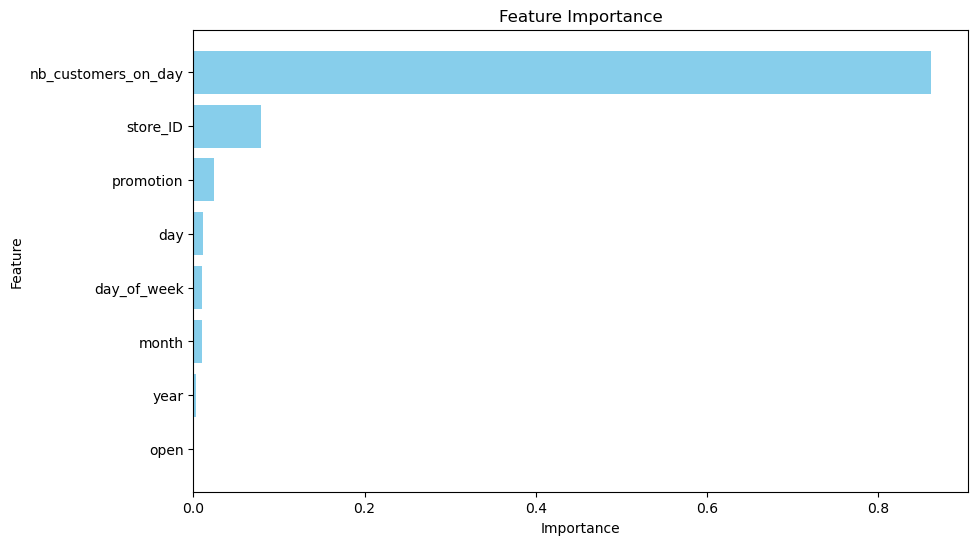

In [19]:
# Try to find a better r2 score for the Random Forest model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
rf_reg = RandomForestRegressor(random_state=4, n_estimators= 30)
rf_reg.fit(X_train, y_train)

# Calculate feature importances
feature_importances = rf_reg.feature_importances_

# Display Feature Importance
# Create a DataFrame to display feature names and their importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [20]:
# Predicitons on real data
real_data = pd.read_csv('/Users/diegoalonso/Documents/Ironhack/Lessons/Week_2/Day_5/IronKaggle/REAL_DATA.csv')
# Fill NaN values with 0 before conversion
real_data["sales"] = real_data["sales"].fillna(0).astype('int64')

# Check updated data types
real_data_dtypes_after = real_data.dtypes

real_data.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,272371,415,7,01/03/2015,0,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0,0


In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             640840 non-null  int64
 1   day_of_week          640840 non-null  int64
 2   nb_customers_on_day  640840 non-null  int64
 3   open                 640840 non-null  int64
 4   promotion            640840 non-null  int64
 5   day                  640840 non-null  int32
 6   month                640840 non-null  int32
 7   year                 640840 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 31.8 MB


In [26]:
# Clean and preprocess the new dataset in the same way as the training set
real_data['date'] = pd.to_datetime(real_data['date'], dayfirst=True)
real_data['day'] = real_data['date'].dt.day
real_data['month'] = real_data['date'].dt.month
real_data['year'] = real_data['date'].dt.year
real_data_cleaned = real_data.drop(['date', 'state_holiday', 'school_holiday', 'index', 'sales'], axis=1)
real_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   store_ID             71205 non-null  int64
 1   day_of_week          71205 non-null  int64
 2   nb_customers_on_day  71205 non-null  int64
 3   open                 71205 non-null  int64
 4   promotion            71205 non-null  int64
 5   day                  71205 non-null  int32
 6   month                71205 non-null  int32
 7   year                 71205 non-null  int32
dtypes: int32(3), int64(5)
memory usage: 3.5 MB


In [33]:
# Ensure all columns from the training data exist in the prediction dataset
missing_cols = set(X.columns) - set(real_data_cleaned.columns)
for col in missing_cols:
    real_data_cleaned[col] = 0  # Add missing columns with a default value of 0

# Ensure the columns are in the same order as the training data
real_data_cleaned = real_data_cleaned[X.columns]

# Make predictions using the trained model
predictions = rf_reg.predict(real_data_cleaned)

# Add predictions to the original dataframe
real_data_cleaned['predicted_sales'] = predictions

# Save the predictions to a new CSV file
real_data_cleaned.to_csv('REAL_DATA_with_predictions.csv', index=False)

# Print the first few rows with predictions
print(real_data_cleaned.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  day  month  \
0       415            7                    0     0          0    1      3   
1        27            7                    0     0          0   29     12   
2       404            3                  657     1          1   19      3   
3       683            2                  862     1          0   29      1   
4       920            3                  591     1          1   19      3   

   year  predicted_sales  
0  2015         0.000000  
1  2013         0.000000  
2  2014      6259.866667  
3  2013      7784.366667  
4  2014      5949.100000  
